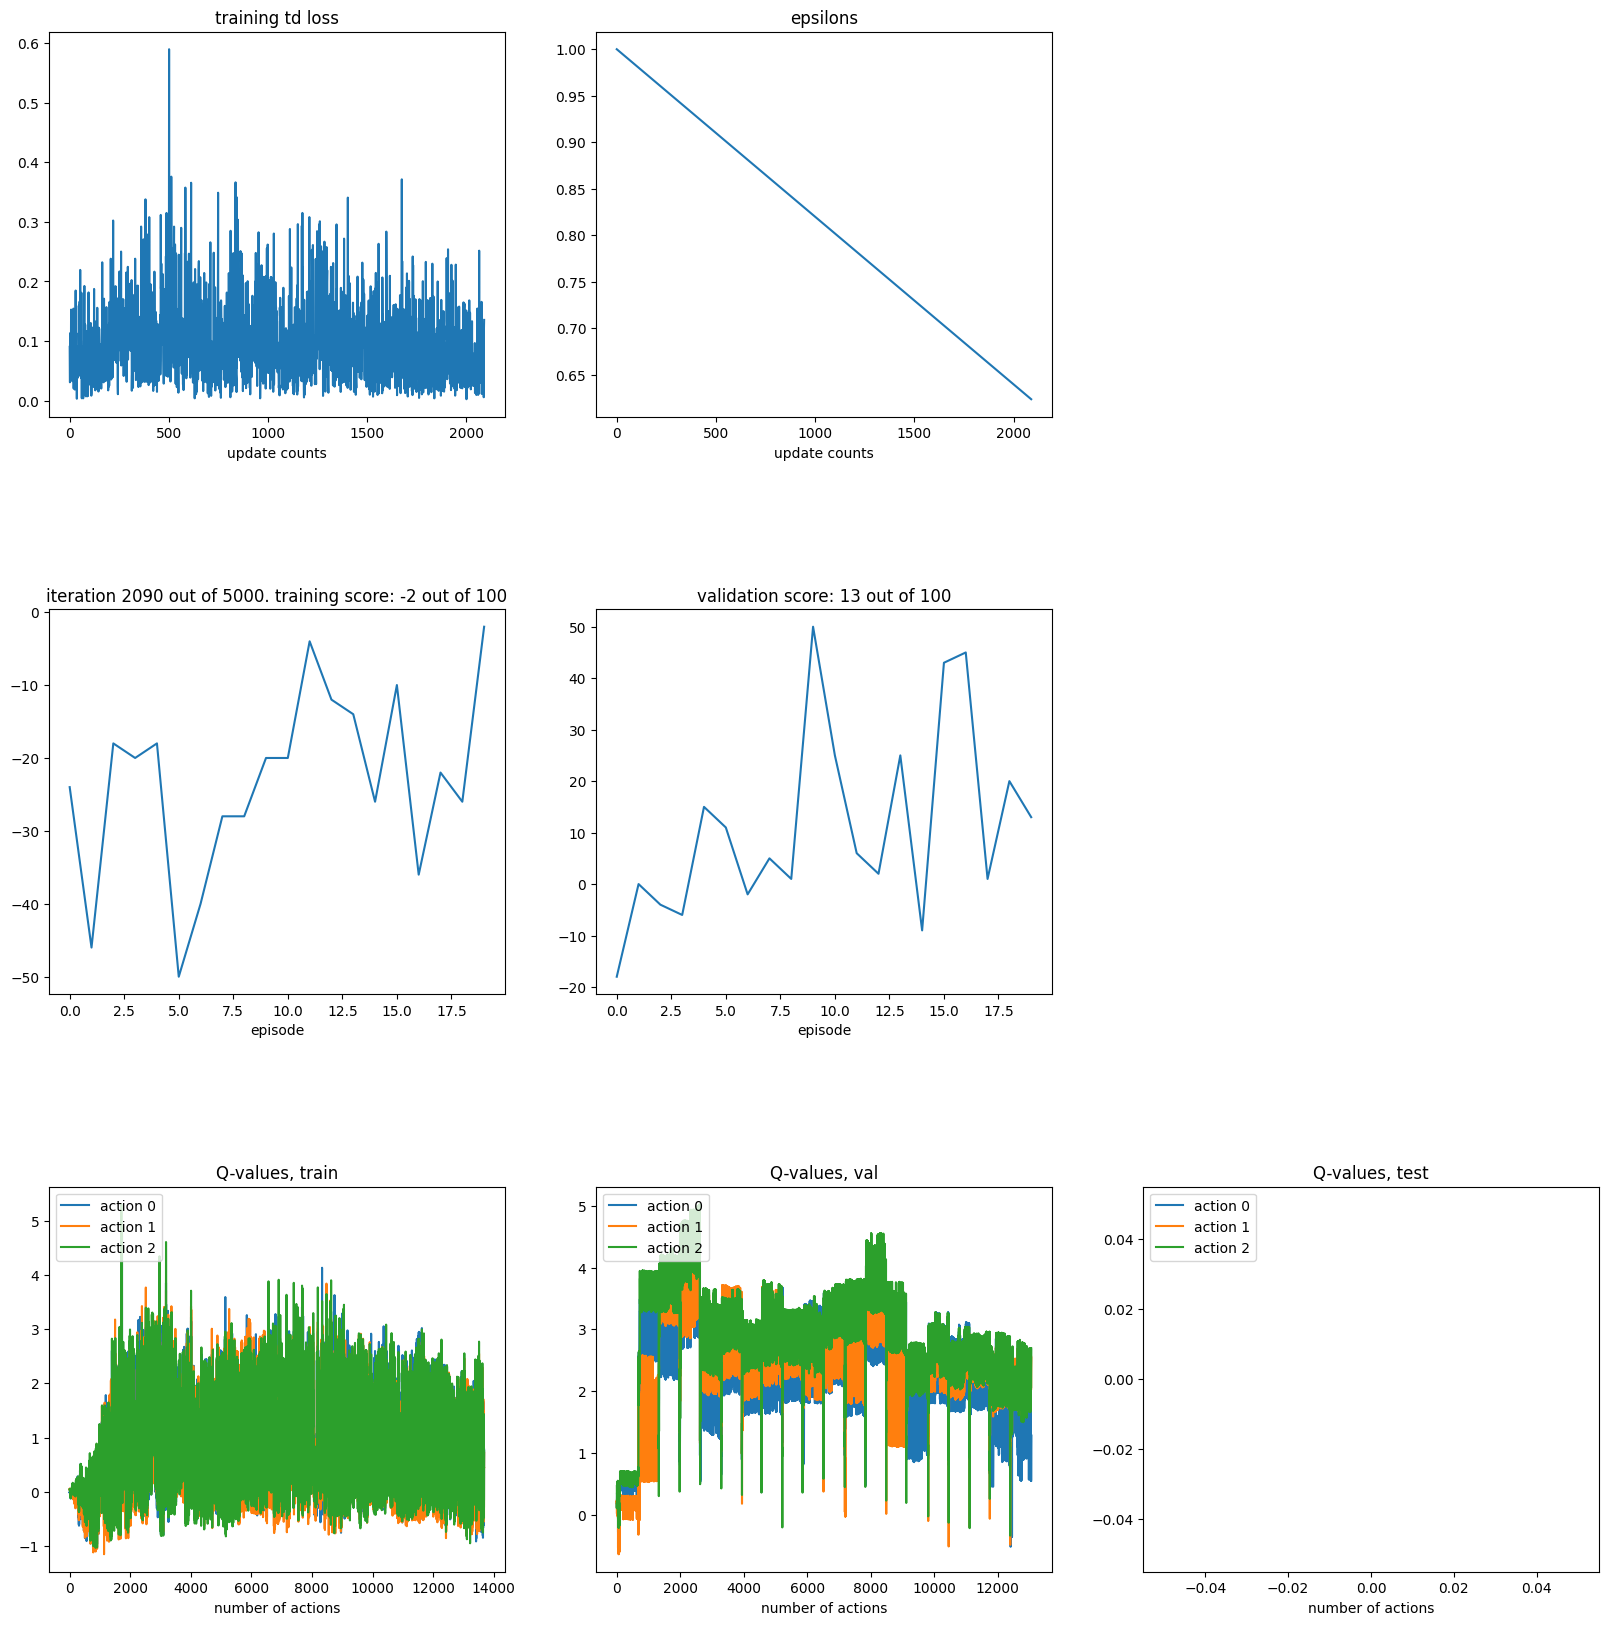

In [1]:
%matplotlib inline
import logging

logger = logging.getLogger()
logger.disabled = True

import random

from copy import deepcopy
from tqdm.auto import tqdm
from agent.dqn import DQNMMAgent

room_size = "xs"

capacity = {
    "episodic": 2,
    "episodic_agent": 0,
    "semantic": 2,
    "semantic_map": 0,
    "short": 1,
}

config = {
    "question_prob": 1.0,
    "terminates_at": 99,
    "randomize_observations": False,
    "room_size": room_size,
    "rewards": {"correct": 1, "wrong": -1, "partial": -1},
    "make_everything_static": False,
    "num_total_questions": 100,
    "question_interval": 1,
    "include_walls_in_observations": True,
}


params = {
    "env_str": "room_env:RoomEnv-v2",
    "max_epsilon": 1.0,
    "min_epsilon": 0.1,
    "epsilon_decay_until": 100 * 50,
    "gamma": 0.9,
    "capacity": capacity,
    "nn_params": {
        "hidden_size": 64,
        "num_layers": 2,
        "embedding_dim": 64,
        "v1_params": None,
        "v2_params": {},
        "memory_of_interest": [
            "episodic",
            "semantic",
            "short",
        ],
        "fuse_information": "sum",
        "include_positional_encoding": True,
        "max_timesteps": config["terminates_at"] + 1,
        "max_strength": config["terminates_at"] + 1,
    },
    "num_iterations": 100 * 50,
    "replay_buffer_size": 100 * 50,
    "warm_start": 100 * 50 / 2,
    "batch_size": 16,
    "target_update_interval": 10,
    "pretrain_semantic": False,
    "run_test": True,
    "num_samples_for_results": 10,
    "train_seed": 5,
    "plotting_interval": 10,
    "device": "cpu",
    "test_seed": 0,
    "qa_policy": "episodic_semantic",
    "explore_policy": "avoid_walls",
    "env_config": config,
    "ddqn": True,
    "dueling_dqn": True,
    "split_reward_training": False,
    "default_root_dir": f"./training_results/{room_size}/",
    "run_handcrafted_baselines": [
        {"mm": mm, "qa": qa, "explore": explore, "pretrain_semantic": pretrain_semantic}
        for mm in ["random", "episodic", "semantic"]
        for qa in ["episodic_semantic"]
        for explore in ["random", "avoid_walls"]
        for pretrain_semantic in [False]
    ],
}
agent = DQNMMAgent(**params)
agent.train()

params_all = []

# for _ in range(1000):
#     params_ = deepcopy(params)
#     params_["gamma"] = random.choice([0.9, 0.95, 0.99, 0.999])
#     params_["batch_size"] = random.choice([32*1, 32*2, 32*4, 32*8])
#     params_["warm_start"] = random.choice([32*16, 32*32, 32*64, 32*128])
#     params_["replay_buffer_size"] = random.choice([32*32, 32*64, 32*128, 32*256])
#     # params_["nn_params"]["hidden_size"] = random.choice([32, 64, 128, 256])
#     # params_["nn_params"]["embedding_dim"] = params_["nn_params"]["hidden_size"]
#     params_["target_update_interval"] = random.choice([4, 8, 16, 32])

#     params_all.append(params_)


# for params in tqdm(params_all):
#     agent = DQNMMAgent(**params)
#     agent.train()